In [2]:
dataset=pd.read_csv("c:/dataset/SIH/rainfall in india 1901-2015.csv",encoding = "ISO-8859-1")
dataset.dtypes

SUBDIVISION     object
YEAR             int64
JAN            float64
FEB            float64
MAR            float64
APR            float64
MAY            float64
JUN            float64
JUL            float64
AUG            float64
SEP            float64
OCT            float64
NOV            float64
DEC            float64
ANNUAL         float64
Jan-Feb        float64
Mar-May        float64
Jun-Sep        float64
Oct-Dec        float64
dtype: object

In [3]:
groups = dataset.groupby('SUBDIVISION')['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','NOV','DEC']
data=groups.get_group(('PUNJAB'))
data.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,NOV,DEC
1472,1901,55.7,50.1,25.2,2.1,25.2,10.4,178.2,145.0,24.4,0.0,3.3
1473,1902,0.0,0.8,9.9,10.9,29.6,49.9,125.6,94.9,67.2,0.0,0.1
1474,1903,29.5,0.5,45.0,1.3,9.2,5.2,212.2,119.1,132.5,0.0,9.5
1475,1904,24.2,1.7,87.8,1.2,13.8,22.0,59.9,124.0,73.8,9.8,25.9
1476,1905,53.0,40.3,24.3,0.5,2.2,19.2,122.6,50.3,111.1,0.0,9.4


In [4]:
data=data.melt(['YEAR']).reset_index()
data.head()

,index,YEAR,variable,value
0,0,1901,JAN,55.7
1,1,1902,JAN,0.0
2,2,1903,JAN,29.5
3,3,1904,JAN,24.2
4,4,1905,JAN,53.0


In [5]:
df= data[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()

,index,YEAR,variable,value
0,0,1901,JAN,55.7
115,115,1901,FEB,50.1
230,230,1901,MAR,25.2
345,345,1901,APR,2.1
460,460,1901,MAY,25.2


In [6]:
df.columns=['INDEX','YEAR','Month','avg_rainfall']
df.head()

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,JAN,55.7
115,115,1901,FEB,50.1
230,230,1901,MAR,25.2
345,345,1901,APR,2.1
460,460,1901,MAY,25.2


In [7]:
d={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(d)
df.head(12)

,INDEX,YEAR,Month,avg_rainfall
0,0,1901,1,55.7
115,115,1901,2,50.1
230,230,1901,3,25.2
345,345,1901,4,2.1
460,460,1901,5,25.2
575,575,1901,6,10.4
690,690,1901,7,178.2
805,805,1901,8,145.0
920,920,1901,9,24.4
1035,1035,1901,11,0.0


In [8]:
df['Date']=pd.to_datetime(df.assign(Day=1).loc[:,['YEAR','Month','Day']])
df.head(12)

,INDEX,YEAR,Month,avg_rainfall,Date
0,0,1901,1,55.7,1901-01-01
115,115,1901,2,50.1,1901-02-01
230,230,1901,3,25.2,1901-03-01
345,345,1901,4,2.1,1901-04-01
460,460,1901,5,25.2,1901-05-01
575,575,1901,6,10.4,1901-06-01
690,690,1901,7,178.2,1901-07-01
805,805,1901,8,145.0,1901-08-01
920,920,1901,9,24.4,1901-09-01
1035,1035,1901,11,0.0,1901-11-01


In [9]:
cols=['avg_rainfall']
dataset=df[cols]
dataset.head()

,avg_rainfall
0,55.7
115,50.1
230,25.2
345,2.1
460,25.2


In [10]:
series=dataset
series.head()

,avg_rainfall
0,55.7
115,50.1
230,25.2
345,2.1
460,25.2


In [11]:
series.shape

(1265, 1)

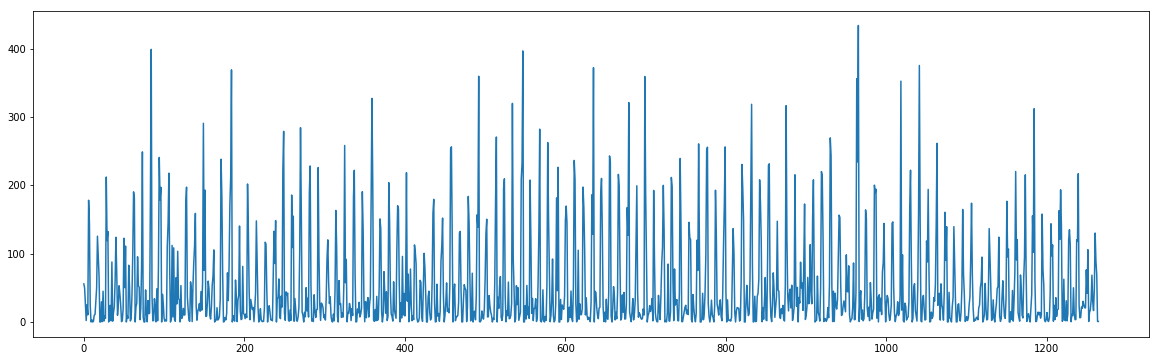

In [12]:
pyplot.figure(figsize=(20,6))
pyplot.plot(series.values)
pyplot.show()

In [13]:
# Get the raw data values from the pandas data frame.
data_raw = series.values.astype("float32")

# We apply the MinMax scaler from sklearn
# to normalize data in the (0, 1) interval.
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(data_raw)

# Print a few values.
dataset[0:5]

array([[0.12831144],
       [0.11541119],
       [0.05805114],
       [0.00483759],
       [0.05805114]], dtype=float32)

In [14]:
TRAIN_SIZE = 0.80

train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print("Number of entries (training set, test set): " + str((len(train), len(test))))

Number of entries (training set, test set): (1012, 253)


In [15]:
# FIXME: This helper function should be rewritten using numpy's shift function. See below.
def create_dataset(dataset, window_size = 1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size), 0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size, 0])
    return(np.array(data_X), np.array(data_Y))

In [16]:
# Create test and training sets for one-step-ahead regression.
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print("Original training data shape:")
print(train_X.shape)

# Reshape the input data into appropriate form for Keras.
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))
print("New training data shape:")
print(train_X.shape)

Original training data shape:
(1010, 1)
New training data shape:
(1010, 1, 1)


In [17]:
def fit_model(train_X, train_Y, window_size = 1):
    model = Sequential()
    
    model.add(LSTM(2000,activation = 'tanh', inner_activation = 'hard_sigmoid', input_shape = (1, window_size)))
    model.add(Dropout(0.2))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(500))
    model.add(Dropout(0.4))
    model.add(Dense(400))
    model.add(Dropout(0.4))
    model.add(Dense(1, activation = 'linear'))
    model.compile(loss = "mean_squared_error", 
                  optimizer = "adam")
    model.fit(train_X, 
              train_Y, 
              epochs = 10, 
              batch_size = 64, 
              )
    
    return(model)

# Fit the first model.
model1 = fit_model(train_X, train_Y, window_size)

C:\Users\Priyansh Mishra\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(2000, activation="tanh", input_shape=(1, 1), recurrent_activation="hard_sigmoid")`
  after removing the cwd from sys.path.



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/10
1010/1010 [==============================] - 20s 20ms/step - loss: 0.0279
Epoch 2/10
1010/1010 [==============================] - 8s 8ms/step - loss: 0.0255
Epoch 3/10
1010/1010 [==============================] - 8s 8ms/step - loss: 0.0259
Epoch 4/10
1010/1010 [==============================] - 8s 8ms/step - loss: 0.0308
Epoch 5/10
1010/1010 [==============================] - 8s 8ms/step - loss: 0.0270
Epoch 6/10
1010/1010 [==============================] - 8s 8ms/step - loss: 0.0260
Epoch 7/10
1010/1010 [==============================] - 7s 7ms/step - loss: 0.0275
Epoch 8/10
1010/1010 [==============================] - 7s 7ms/step - loss: 0.0269
Epoch 9/10
1010/1010 [==============================] - 7s 7ms/step - loss: 0.0262
Epoch 10/10
1010/1010 [================

In [18]:
import math
def predict_and_score(model, X, Y):
    # Make predictions on the original scale of the data.
    pred = scaler.inverse_transform(model.predict(X))
    # Prepare Y data to also be on the original scale for interpretability.
    orig_data = scaler.inverse_transform([Y])
    # Calculate RMSE.
    score = math.sqrt(mean_squared_error(orig_data[0], pred[:, 0]))
    return(score, pred)

rmse_train, train_predict = predict_and_score(model1, train_X, train_Y)
rmse_test, test_predict = predict_and_score(model1, test_X, test_Y)

print("Training data score: %.2f RMSE" % rmse_train)
print("Test data score: %.2f RMSE" % rmse_test)

Training data score: 71.13 RMSE
Test data score: 60.63 RMSE


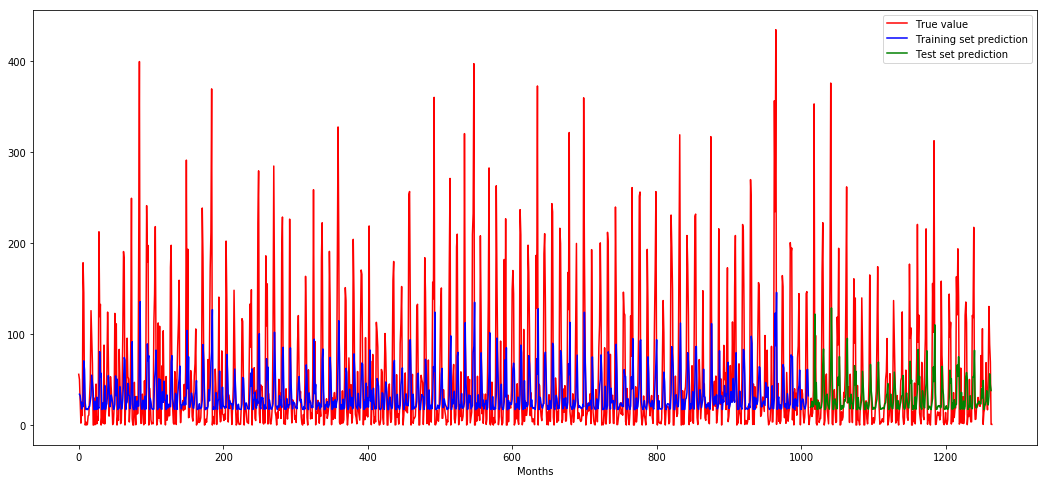

In [21]:
# Start with training predictions.
train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[window_size:len(train_predict) + window_size, :] = train_predict

# Add test predictions.
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (window_size * 2) + 1:len(dataset) - 1, :] = test_predict

# Create the plot.
plt.figure(figsize = (18, 8))
plt.plot(scaler.inverse_transform(dataset), label = "True value",color='red')
plt.plot(train_predict_plot, label = "Training set prediction",color='blue')
plt.plot(test_predict_plot, label = "Test set prediction",color='green')
plt.xlabel("Months")


plt.legend()
plt.show()